In [3]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [4]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

In [6]:
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear': 'halofit'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [7]:
classy_template

{'output': 'tCl pCl lCl',
 'l_max_scalars': 2500,
 'lensing': 'yes',
 'non linear': 'halofit',
 'omega_b': 0.02222,
 'omega_cdm': 0.1197,
 'h': 0.69,
 'A_s': 2.1955e-09,
 'n_s': 0.9655,
 'tau_reio': 0.06}

In [8]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [9]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_right', classy_dict=classy_right)

In [10]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)

In [11]:
fisher = example_Planck.get_fisher(obs)

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


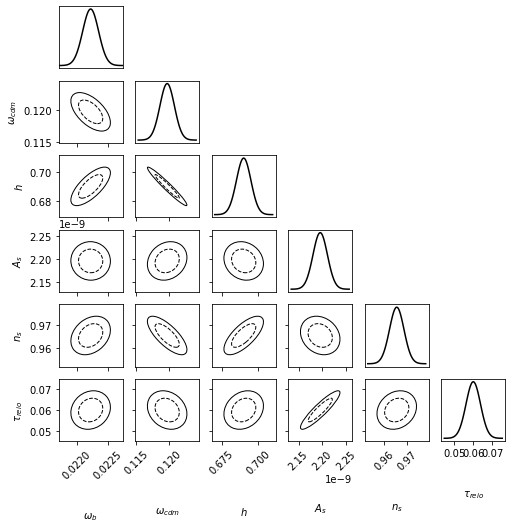

In [12]:
cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
fishchips.util.plot_triangle(obs, cov, labels=labels);

(1e-06, 10000.0)

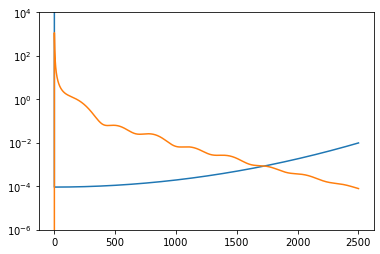

In [13]:
plt.plot(example_Planck.noise_T, '-')
plt.plot(obs.cosmos['fiducial'].lensed_cl()['tt'] * (2.72*1e6)**2, '-')
plt.yscale('log')
plt.ylim(1e-6,1e4)

# Plotting without an `obs` object

You might want to plot a generic covariance matrix. You can avoid constructing an `Observables` object and just use the fishchips plotting utilities, by calling `plot_triangle_base`. The `plot_ellipse` function is general and doesn't depend on `fishchips` either.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


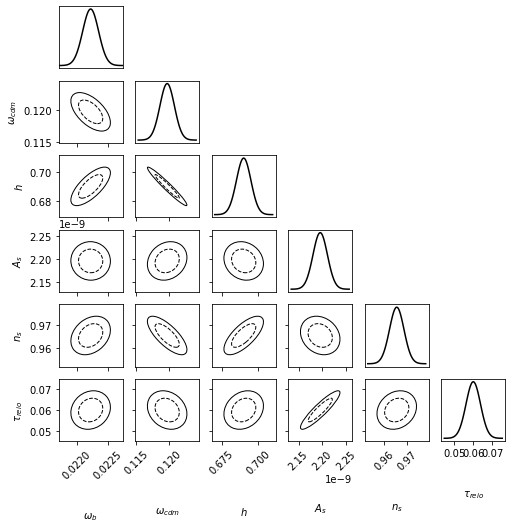

In [14]:
import fishchips.util

cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
fig, axes = fishchips.util.plot_triangle_base(pars, centers, cov, labels=labels);

You can pass arguments as you would to `ax.set_xlabel` and `ax.set_ylabel` using the `xlabel_kwargs` and `ylabel_kwargs` parameters.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


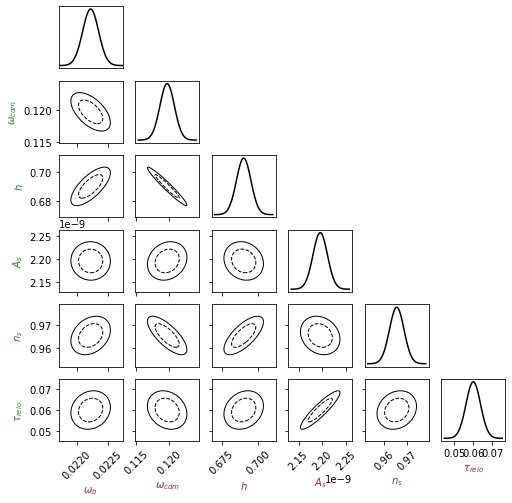

In [15]:
fig, axes = fishchips.util.plot_triangle_base(
    pars, centers, cov, labels=labels,
    xlabel_kwargs={'color':'brown', 'fontsize':10},
    ylabel_kwargs={'color':'forestgreen'}
);

In [16]:
Fish_me = [[2732364953.41392, -775966806.8818928, -120292617.43766977, 1.130639636956318e+16, 25023278.494432256, -83170427.58433975, 5.434606024995074e+31], [-775966806.8818928, 520118611.81304866, 31134230.823611118, 5054721695875350.0, 23100827.91572183, 17914180.517426234, -6.4120984868987e+31], [-120292617.43766977, 31134230.823611118, 14548388.98358209, -1483110669711236.0, -3976860.610783266, 4079399.1773681543, 3.539223157188873e+30], [1.130639636956318e+16, 5054721695875350.0, -1483110669711236.0, 7.881188358487022e+23, 1861452902034883.5, -2268432716791988.0, -1.8129906909588023e+39], [25023278.494432256, 23100827.91572183, -3976860.610783266, 1861452902034883.5, 5446803.64287078, -4290395.220435857, -6.716461205966696e+30], [-83170427.58433975, 17914180.517426234, 4079399.1773681543, -2268432716791988.0, -4290395.220435857, 9753327.687345216, 3.0353716648801654e+29], [5.434606024995074e+31, -6.4120984868987e+31, 3.539223157188873e+30, -1.8129906909588023e+39, -6.716461205966696e+30, 3.0353716648801654e+29, 1.4339590832029811e+55]]

In [17]:
Fish_ai = [[2727774372.079602, -770823480.9424974, -120576622.85334358, 1.14449072080859e+16, 25568052.321787916, -83170794.34490964, 5.309447604511184e+31], [-770823480.9424974, 514355749.2767431, 31452429.16708849, 4899543677395040.0, 22490178.075975563, 17914591.373346373, -6.271692405751913e+31], [-120576622.85334358, 31452429.16708849, 14530817.692864818, -1474540442115544.5, -3943170.895439858, 4079376.4824460614, 3.461859164729262e+30], [1.14449072080859e+16, 4899543677395040.0, -1474540442115544.2, 7.839380260858665e+23, 1845040404154383.2, -2268421643039421.5, -1.77535576212276e+39], [25568052.321787912, 22490178.075975563, -3943170.895439858, 1845040404154383.2, 5381681.136969417, -4290351.8266372355, -6.565264356135951e+30], [-83170794.34490964, 17914591.373346373, 4079376.4824460614, -2268421643039421.5, -4290351.8266372355, 9753327.658005176, 3.0343787582732693e+29], [5.309447604511184e+31, -6.271692405751913e+31, 3.461859164729262e+30, -1.77535576212276e+39, -6.565264356135951e+30, 3.0343787582732696e+29, 1.3982655357973328e+55]]

In [20]:
cov_me = np.linalg.inv(Fish_me)
cov_ai = np.linalg.inv(Fish_ai)

## Overplotting
You just pass the `fig` and `axes` you get from the previous plot, into the next one.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


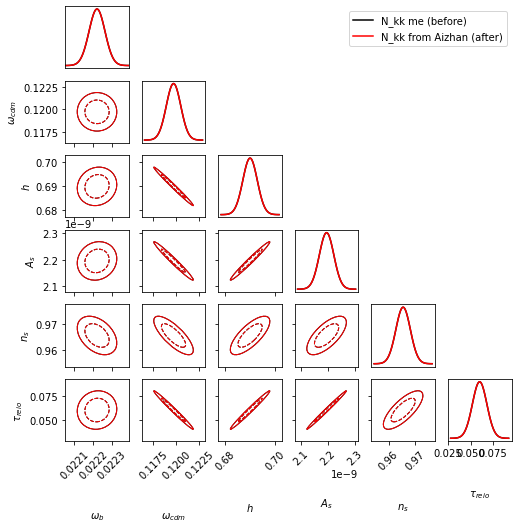

In [21]:
import fishchips.util

cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
fig, axes = fishchips.util.plot_triangle_base(pars, centers, cov_me, labels=labels);

# now plot a slightly worse instrument
fishchips.util.plot_triangle_base(pars, centers, cov_ai, 
                                  f=fig, ax=axes, labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'red'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'red'},
                                  color_1d='red'
                                 );

l1, = axes[0, -1].plot([],[],'-',color="black", label='N_kk me (before)')
l2, = axes[0, -1].plot([],[],'-',color="red", label='N_kk from Aizhan (after)')
axes[0, -1].legend()
fig.savefig("before_using_kk_from_aizhan.png")

## Custom Plotting
You might want to get *really customized*. Then you probably just call `plot_ellipse` in your own loop. Here the outer ellipse is **sketchy** and the inner ellipse is **funky**.

Text(0, 0.5, '$\\tau_{reio}$')

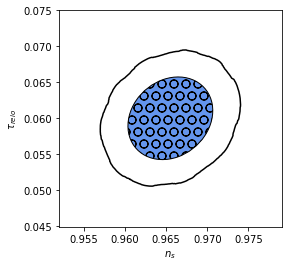

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

fishchips.util.plot_ellipse(ax, 'n_s', 'tau_reio',
                            pars, centers, cov, 
                            kwargs1={
                                'facecolor' : 'cornflowerblue',
                                'hatch' : 'O',
                                'alpha' : 0.5
                            },
                            kwargs2={
                                'sketch_params' : 1.0,
                                'lw' : 1.5
                            }
                           );
ax.set_xlabel(r'$n_s$')
ax.set_ylabel(r'$\tau_{reio}$')